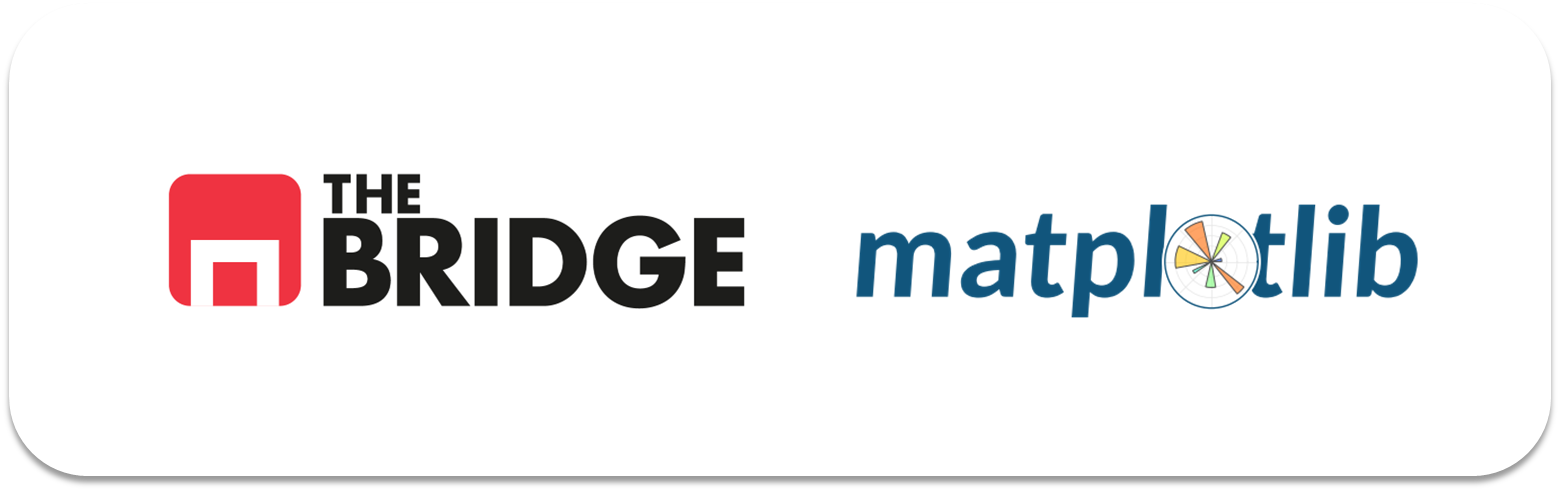

# Visualización con Matplotlib: Diagramas de barras y visualización de errores

Importemos nuestras librerías y comencemos con los gráficos de barras, que ya conoces porque son los que empleamos a la hora de mostrar las frecuencias de las variables categóricas:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


Además nos apoyaremos en el dataset del titanic para los ejemplos:

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")

In [3]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Graficos de Barras y Count plots

Los gráficos de barras se emplean para comparar datos de forma más general y cuando se emplean para comparar frecuencias también reciben el nombre de Count plots. La sintaxis del gráfico de barras en matplotlib es muy sencilla:

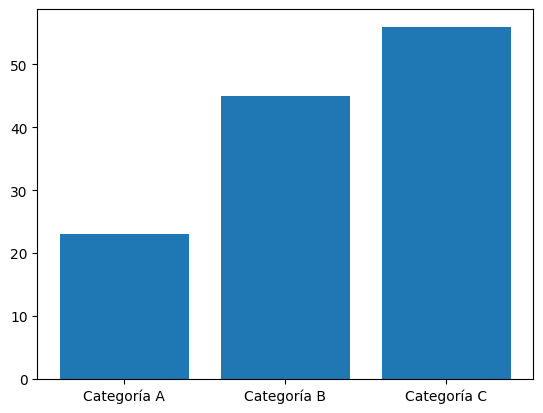

In [4]:

# Datos de ejemplo
categorias = ['Categoría A', 'Categoría B', 'Categoría C']
valores = [23, 45, 56]

# Crear gráfico de barras
plt.bar(categorias, valores);



Pero si queremos obtener un gráfico de frencuencias le tenemos que dar estas calculadas, veamos como sería el gráfico de frecuencias absolutas y de frecuencias relativas para la columna "who" del titanic, empleando ya algunos de nuestros aprendizajes:

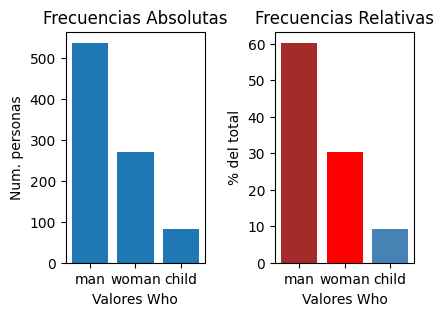

In [5]:
# frecuencias absolutas
categorias = df_titanic.who.value_counts().index.to_list()
frecuencias = df_titanic.who.value_counts().to_list()
frec_relativas = (df_titanic.who.value_counts(normalize = True) * 100).to_list()
fig,ax = plt.subplots(1,2, figsize = (4.5,3))
fig.subplots_adjust(wspace = 0.5)
ax[0].bar(categorias, frecuencias)
ax[0].set_title("Frecuencias Absolutas")
ax[0].set_xlabel("Valores Who")
ax[0].set_ylabel("Num. personas")
ax[1].bar(categorias, frec_relativas, color = ["brown","red","steelblue"])
ax[1].set_title("Frecuencias Relativas")
ax[1].set_xlabel("Valores Who")
ax[1].set_ylabel("% del total");


### Visualizando Errores


En general, si no vas a hacer un análisis de datos de mediciones no vas a necesitar este tipo de gráficas, pero son muy comunes en ámbitos científicos y para representar medidas que por las condiciones de medición o de los aparatos de medida quieren presentar el posible rango de error que se haya podido cometer al tomarlas. Por ejemplo si necesitamos mucha precisión en la medida de la velocidad de un objeto en un experimento de física y nuestro aparato de medida dice 5 pero también que comete un error de 0.05, lo normal es representar ese 5 como un punto y una barra, denominada barra de error, centrada en la medida y de extremos el resultado de restar y sumar el error (en este caso entre 4.5 y 5.5, resultado de restar 0.05 y sumar 0.05)



En la visualización de datos y resultados, mostrar estos errores de manera efectiva puede hacer que una gráfica transmita mucha más información completa.



Cómo se muestran barras de error básico en matplotlib:

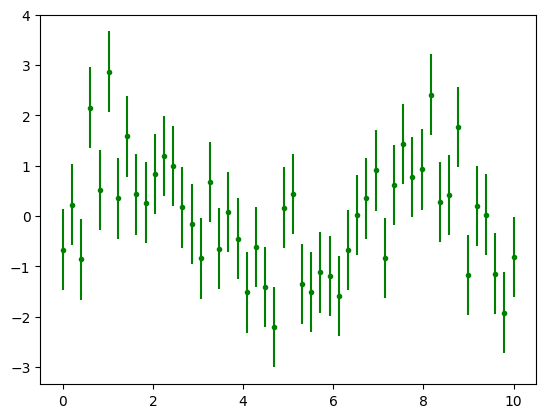

In [6]:
x = np.linspace(0, 10, 50)
dy = 0.8 # el error de nuestro aparato de medida
y = np.sin(x) + dy * np.random.randn(50) # una función inventada con ese error (aleatorio por medida)

plt.errorbar(x, y, yerr=dy, fmt='.g');

Además de estas opciones básicas, la función ``errorbar`` tiene muchas opciones para ajustar finamente las salidas.
Usando estas opciones adicionales, puedes personalizar fácilmente la estética de tu gráfico de barras de error.
A menudo encuentro útil, especialmente en gráficos concurridos, hacer que las barras de error sean más claras que los propios puntos:

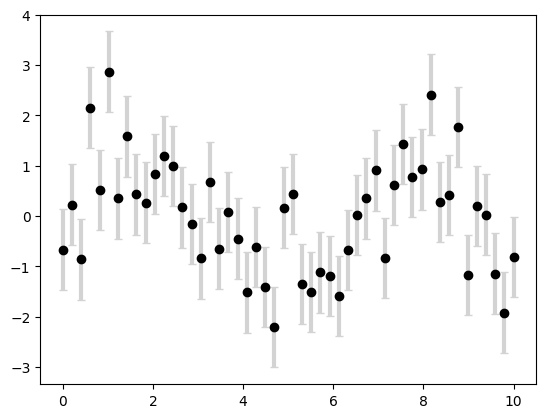

In [7]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=3);

Existen muchas más opciones, que puedes encontrar en la documentación de `plt.errorbar`, pero por lo menos tienes la forma más sencilla de mostrar errores si esa es tu necesidad.
